In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent

recent365 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
recent365

datetime.date(2016, 8, 23)

In [18]:
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [23]:
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= recent365).all()
for row in result:
    print(row.prcp)

0.0
0.08
0.08
0.0
0.0
0.01
0.0
0.0
0.13
0.0
0.0
0.0
0.03
None
None
0.05
0.0
0.03
0.0
0.05
0.0
0.02
1.32
0.42
0.06
0.05
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.06
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.0
0.0
0.05
0.15
0.01
0.0
0.03
0.0
0.0
0.0
0.0
0.24
0.03
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03
0.05
0.01
0.13
0.14
0.05
0.05
0.05
0.0
0.01
0.0
0.14
0.12
0.03
0.0
0.03
0.43
0.02
0.0
0.03
0.52
0.05
0.04
0.01
0.05
0.03
0.0
0.0
0.01
0.13
0.01
0.0
0.0
0.01
0.01
0.01
0.0
0.02
0.0
0.02
0.04
0.12
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.16
0.0
0.04
0.03
0.0
0.0
0.0
0.18
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.51
0.0
0.0
0.0
0.31
2.62
0.01
0.0
0.0
0.07
0.0
0.0
0.0
0.0
0.06
0.06
0.01
0.0
0.03
0.0
0.0
0.0
1.19
0.73
0.47
0.0
0.35
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
1.0
0.09
1.37
0.24
0.7
0.4
0.0
1.25
0.37
0.25
0.95
1.35
0.09
0.04
0.02
0.06
0.38
0.05
0.05
0.53
0.04
0.01
0.0
0.0
0.0
0.02
0.05
0.91
0.02
None
2.87
2.11
0.22
0.72
1.03
0.3
0.29
0.69
0.2
0.79
0.72
1.27
1.62
0.31
1.6
0.0
0.02
0.03
0.42
0.04
0.13
0.01
0.09
0.33
0.03
0.0
None
0.15
0.0
0.55
1.24
0.83
1.08
0.38
1.48
0.14
0.14
1.03
2.37
0.9
0.03
0.0
0.0
0.0
0.47
0.1
0.0
0.03
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.0
0.07
0.0
0.0
0.08
0.72
0.85
1.85
2.64
0.1
0.03
0.0
0.55
0.0
0.0
0.0
0.0
None
0.0
0.0
1.79
0.0
0.0
0.0
0.73
1.83
0.0
0.01
0.07
0.13
None
0.1
0.0
0.07
0.32
0.0
0.0
0.12
0.0
0.0
0.58
2.0
0.58
0.56
0.0
0.35
0.0
0.0
0.0
0.01
0.0
0.0
None
0.0
0.0
0.0
None
0.0
0.0
0.0
0.0
0.03
0.17
0.48
0.0
0.0
0.68
0.07
None
0.2
0.0
0.23
0.02
0.45
0.0
None
0.0
0.0
0.25
0.65
0.23
2.82
0.9
0.11
1.3
0.98
0.14
0.0
1.84
1.35
0.35
0.05
0.0
0.22
0.11
0.79
0.0
0.8
0.25
0.0
None
0.1
0.0
0.03
1.11
0.23
0.55
0.44
0.1
0.1
1.0
0.6
0.3
0.06
0.0
None
0.0
0.3
0.44
2.17
0.88
0.0
0.5
0.0
None
0.01
None
0.82
0.01
0.0
0.01


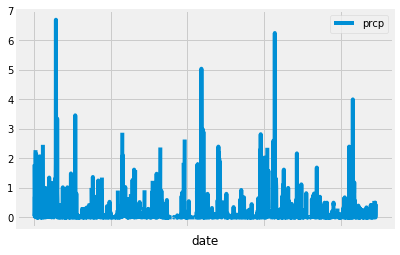

In [28]:
prcp_df = pd.DataFrame(result, columns=['date', 'prcp']).set_index('date')
prcp_sort = prcp_df.sort_index()

prcp_sort.plot()

In [29]:
prcp_sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [30]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
res = session.query(Measurement.station, func.count(Measurement.id)).\
   group_by(Measurement.station).\
   order_by(func.count(Measurement.id).desc()).\
   all()
res

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station = res[0][0]
session.query(func.min(Measurement.tobs),
                                        func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                  filter(Measurement.station == active_station).\
                                  all()

[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


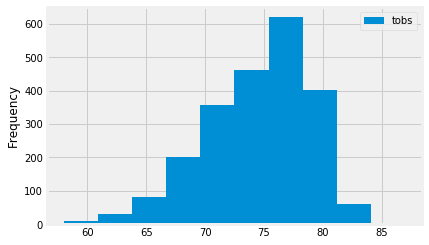

In [62]:
result2 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= recent365).filter(Measurement.station == active_station).all()

tobs_df = pd.DataFrame(result, columns=['date', 'tobs']).set_index('date')
tobs_df.plot(kind='hist')
    

![precipitation](Images/station-histogram.png)

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [73]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
startd = dt.date(2019, 3, 1)
endd = dt.date(2019, 3, 15)

march = (calc_temps('2017-03-01', '2017-03-15'))
print(march)

[(62.0, 71.1086956521739, 82.0)]


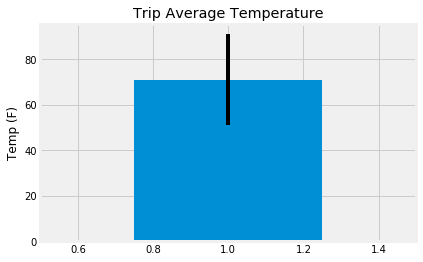

In [75]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig = plt.figure(0)
x = 1
temps = np.ravel(march)
y = march[0][1]
yerr = march[0][2] - march[0][0]
plt.xlim(0.5, 1.5)
#plt.xticks([], [])
plt.bar(x, y, width=0.5)
plt.errorbar(x, y, yerr=yerr, ecolor='black')
plt.title('Trip Average Temperature')
plt.ylabel('Temp (F)')
plt.show()

In [77]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Station.station, Station.name, Station.latitude,
                      Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.date >= '2017-03-01').\
                filter(Measurement.date <= '2017-03-15').\
                group_by(Station).\
                order_by(func.sum(Measurement.prcp).desc()).\
                all()

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.76),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  5.46),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  3.5),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 3.04),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2.7399999999999998),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.32),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.75)]